# IRIS Flower Dataset Classification

### The Iris dataset is a classic and well-known dataset in the field of machine learning. It comprises information about three different species of Iris flowers: Iris setosa, Iris versicolor, and Iris virginica. This dataset is often employed for various tasks such as classification, pattern recognition, and data visualization.

#### The dataset contains the following attributes for each flower specimen:

    1.sepal length in centimeters
    2.sepal width in centimeters
    3.petal length in centimeters
    4.petal width in centimeters
    
    
    
### These attributes serve as features that help discriminate between the three Iris species. The Iris dataset is often used as a fundamental example for introducing concepts such as data preprocessing, exploratory data analysis, and classification algorithms in machine learning courses and tutorials.
### Based on these four features, the goal is often to classify each flower into one of the three species. The dataset is balanced, meaning there is an equal number of samples for each species.

## Import Libraries

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Load the required dataset (Iris Dataset)

In [4]:
df= pd.read_csv("/content/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Drop the Id column as it is not significant here
df=df.drop("Id",axis=1)
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [7]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
#Display the number of samples for each species
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [10]:
#Converting class labels into numerical form

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
df["Species"]

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

## Exploratory Data Analysis

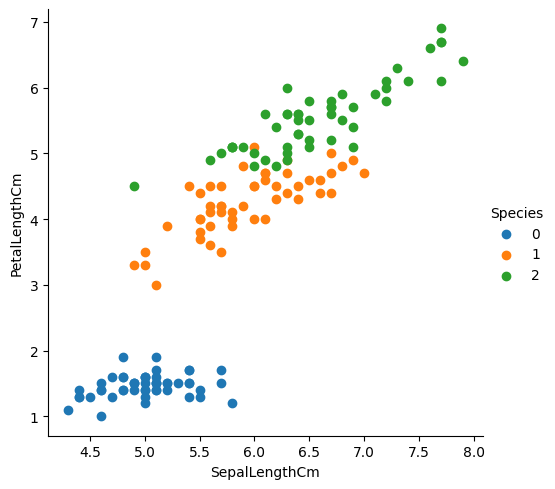

In [11]:
# Plotting the three verities of iris flowers
sns.FacetGrid(df,hue='Species',height=5).map(plt.scatter,'SepalLengthCm','PetalLengthCm').add_legend()

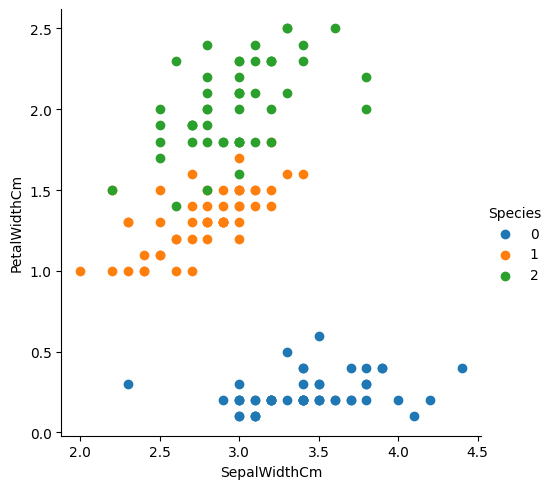

In [12]:
sns.FacetGrid(df,hue='Species',height=5).map(plt.scatter,'SepalWidthCm','PetalWidthCm').add_legend()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


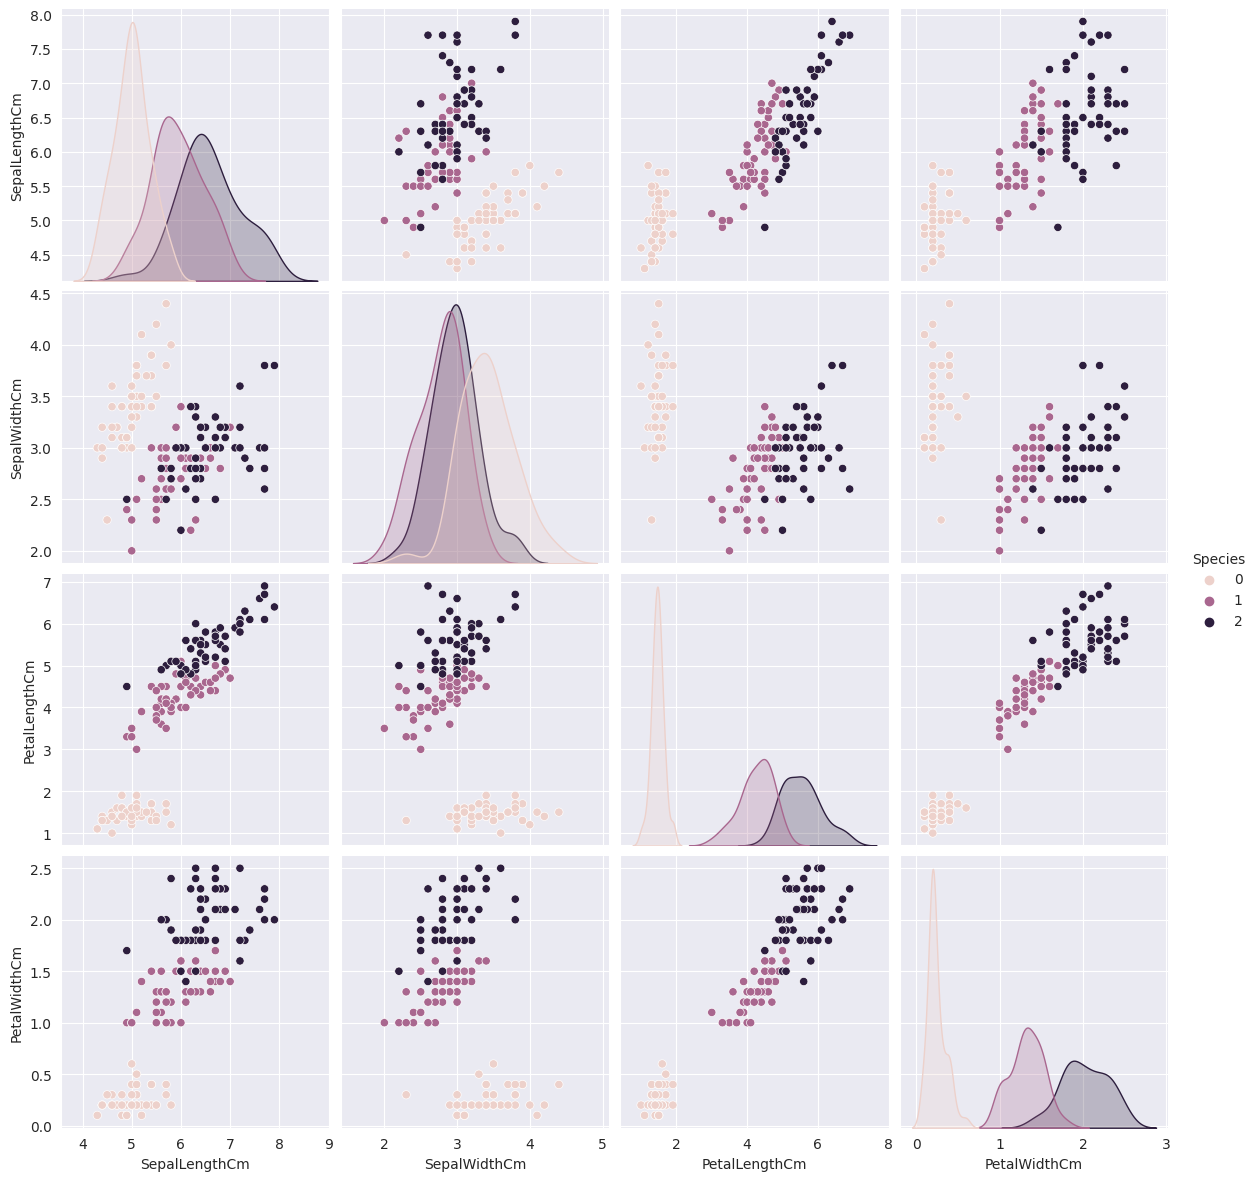

In [13]:
# Pairwise scatter plot: pair plot
#Dis-advantage are 1.can be used when number of features are high.
                #  2.cannot visualize higher dimensional patterns in 3D and 4
plt.close() # closes any previously open plots that might be displayed
sns.set_style("darkgrid")
sns.pairplot(df,hue="Species",size=3)
plt.show()

<Axes: >

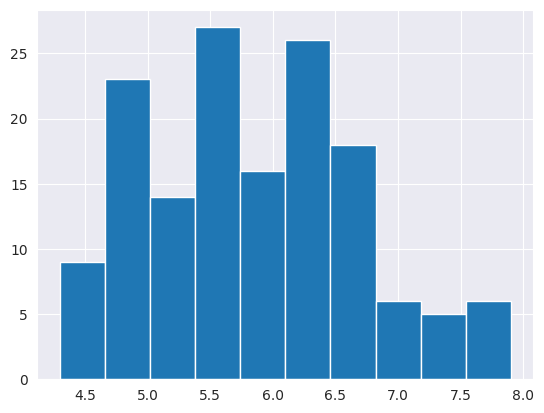

In [14]:
# Plotting histogram for each feature
df['SepalLengthCm'].hist()

<Axes: >

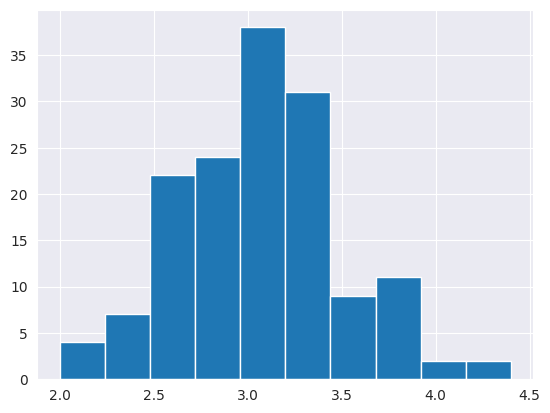

In [15]:
df['SepalWidthCm'].hist()

<Axes: >

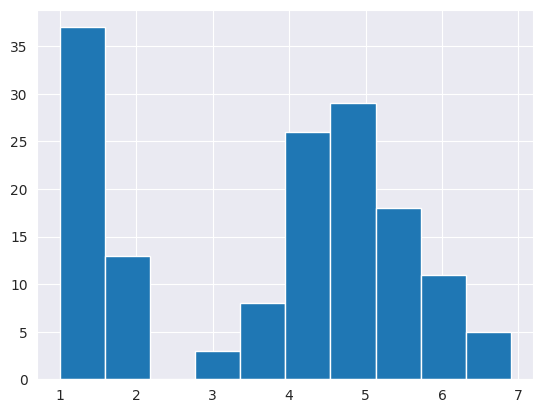

In [16]:
df['PetalLengthCm'].hist()

<Axes: >

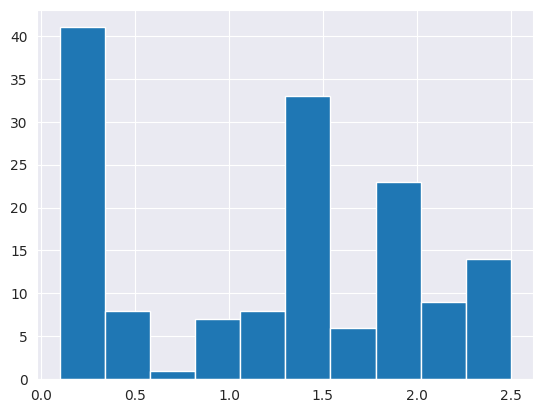

In [17]:
df['PetalWidthCm'].hist()

<Axes: >

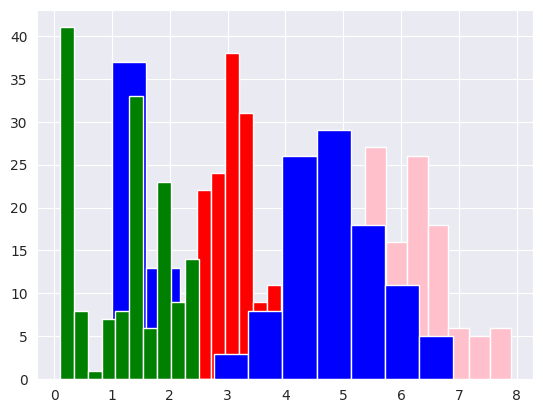

In [18]:
#Plotting histogram for all the features together
df['SepalLengthCm'].hist(color='pink')
df['SepalWidthCm'].hist(color='red')
df['PetalLengthCm'].hist(color='blue')
df['PetalWidthCm'].hist(color='green')

In [19]:
# Plot scatter plot to visualize relationships between features
species=[0,1,2]
color=['red','orange','blue']

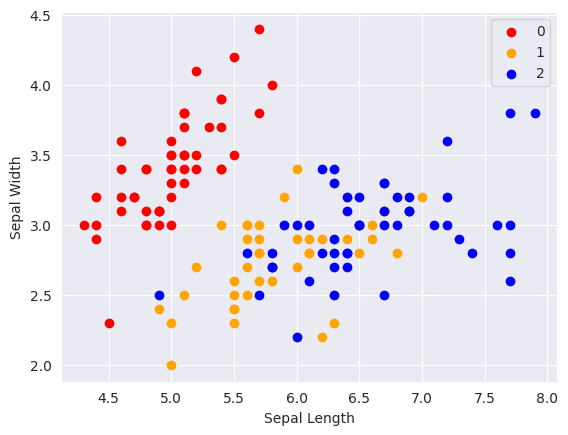

In [20]:
# scatter plot showing relation between Sepal Length and Sepal Width

for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=color[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()


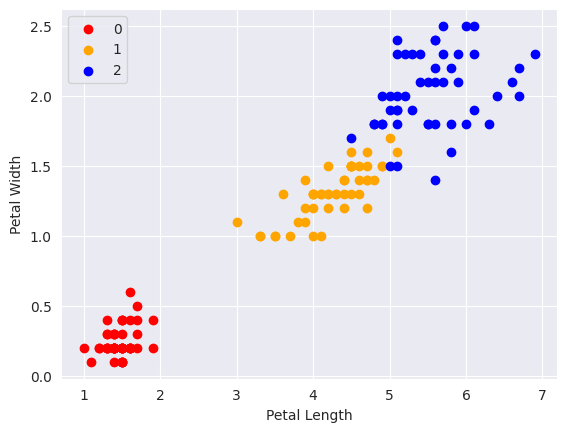

In [21]:
# Scatter plot for Petal Length vs Petal Width
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = color[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

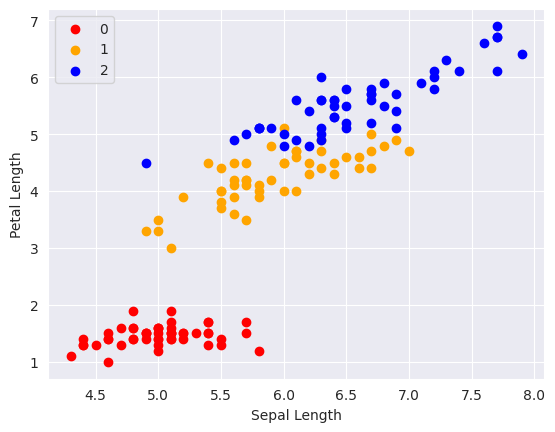

In [22]:
# Scatter plot for Petal Length vs Sepal Length
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = color[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

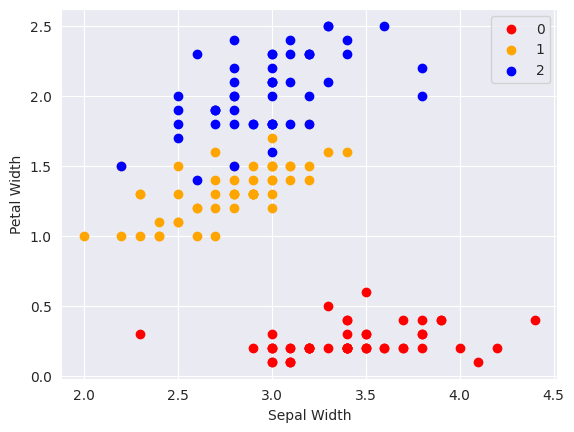

In [23]:
# Scatter plot for Sepal Width vs Petal Width
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = color[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

## Correlation Matrix

A correlation matrix holds a pivotal role in the realm of data analysis as it unveils intricate connections among variables within a dataset. By providing a comprehensive overview of how variables relate to each other, this matrix aids in the identification of patterns, dependencies, and potential insights hidden within the data.



A correlation matrix is a table that displays the correlation coefficients between different variables in a dataset. Correlation coefficients quantify the strength and direction of the linear relationship between two variables. The values typically range from -1 to 1, where:

1: A perfect positive correlation, meaning that as one variable increases, the other variable also increases proportionally.
0: No correlation, indicating that there's no linear relationship between the variables.
-1: A perfect negative correlation, implying that as one variable increases, the other variable decreases proportionally.

In [24]:
# Finding the correlation matrix
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

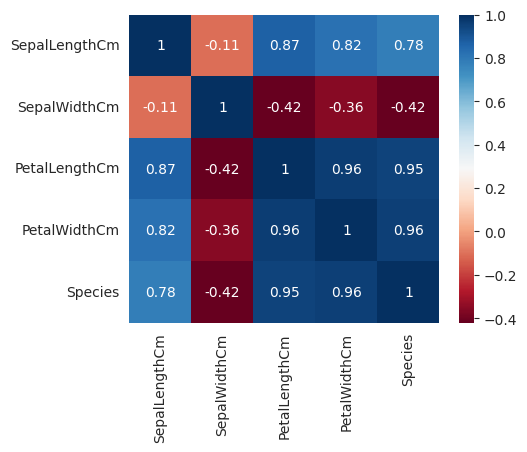

In [25]:
# displaying the correlation matrix using a heatmap
corr=df.corr()
fig, ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='RdBu') #cmap can be Greens,coolwarm,YlGnBu,RdBu

## Model Training

In [26]:
#splitting the data into features X and target Y
X = df.drop('Species',axis=1)
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [27]:
y = df["Species"]
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [28]:
# Doing train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size =0.3,random_state=1)

In [29]:
# Initializing logistic regression model
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()

# model fitting
model1.fit(X_train,y_train)

# model accuracy
print("Accuracy(Logistic Regression): ",model1.score(X_test,y_test)*100)
#model1 can be optimized using standardscalar( The accuracy of optimized model will be 28.888 which creats difficulty while comparing with other model accuracies)

Accuracy(Logistic Regression):  97.77777777777777


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
# K-nearest model (KNN)

from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier()
model2.fit(X_train,y_train)
print("Accuracy (KNN): ",model2.score(X_test,y_test)*100)

Accuracy (KNN):  97.77777777777777


In [31]:
#Decision Tree model

from sklearn.tree import DecisionTreeClassifier
model3=DecisionTreeClassifier()
model3.fit(X_train,y_train)
print("Accuracy (DecisionTree): ",model3.score(X_test,y_test)*100)

Accuracy (DecisionTree):  95.55555555555556


## Confusion Matrix

In [32]:
from sklearn.metrics import confusion_matrix


In [33]:
y_pred1=model1.predict(X_test)
y_pred2=model2.predict(X_test)
y_pred3=model3.predict(X_test)



In [34]:
conf_matrix1 = confusion_matrix(y_test, y_pred1)
conf_matrix2 = confusion_matrix(y_test, y_pred2)
conf_matrix3 = confusion_matrix(y_test, y_pred3)

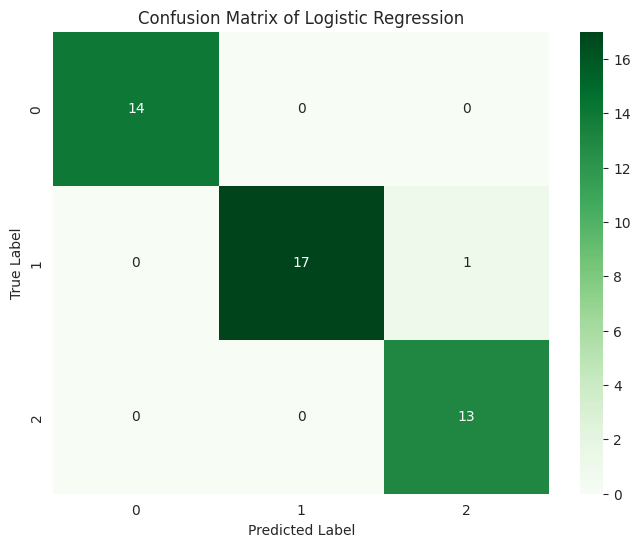

In [35]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Greens', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

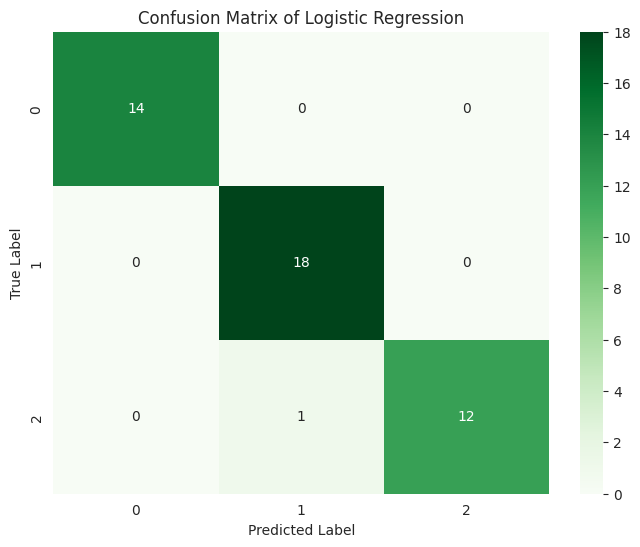

In [36]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Greens', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

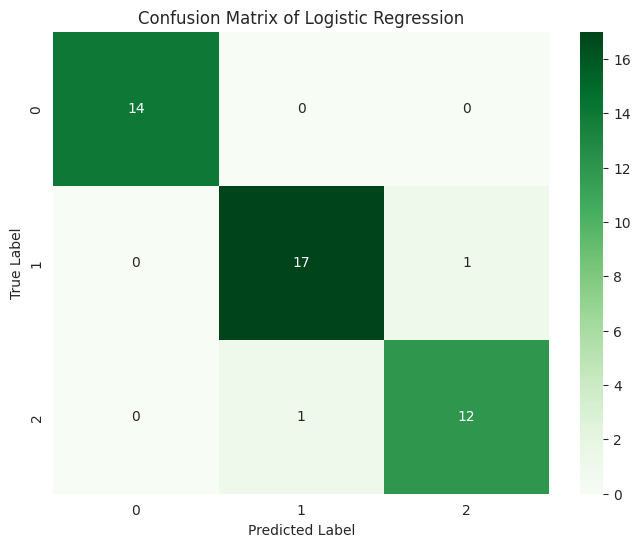

In [37]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Greens', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()